In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams.update({'font.size': 22})

In [2]:
def dice(n):
    return np.random.choice(np.arange(1,11,1),size=n)

In [65]:
results = []
for jj in range(500):
    result = []
    for ii in range(1000):
        temp = dice(3)
        result.append(np.logical_and((temp[-1] != temp[0]),(temp[-1] != temp[1])))
    result = np.array(result)
    results.append(np.sum(result)/1000)
    

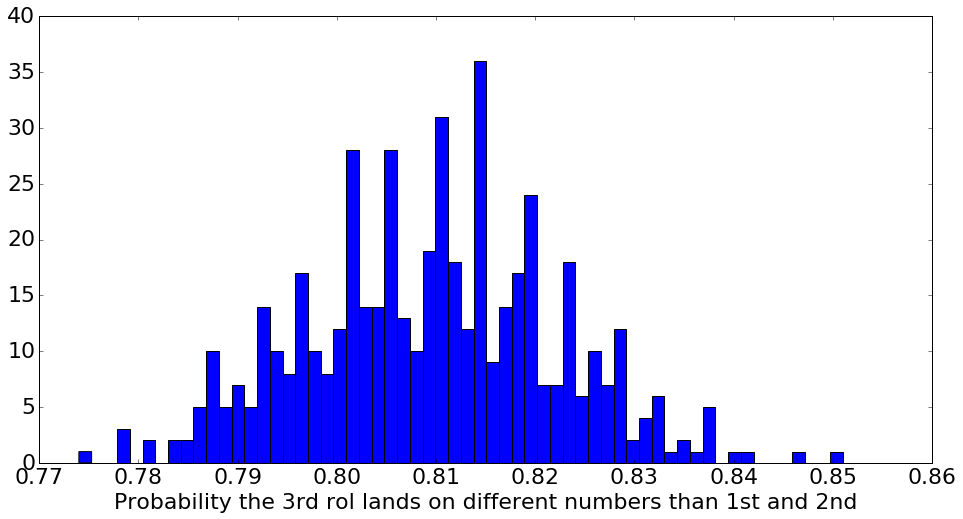

In [66]:
fig,ax = plt.subplots(figsize=(16,8))
_=ax.hist(results,bins=60)
_=ax.set(xlabel='Probability the 3rd rol lands on different numbers than 1st and 2nd')

In [99]:
ns = np.arange(3,16,1)
results = np.zeros((len(ns),100))
for a,n in enumerate(ns):
    
    for jj in range(100):
        result = []
        for ii in range(500):
            temp = dice(n)
            result.append(all(tuple([temp[-1] != temp[k] for k in range(n-1)])))
        result = np.array(result)
        results[a,jj]=np.sum(result)/500

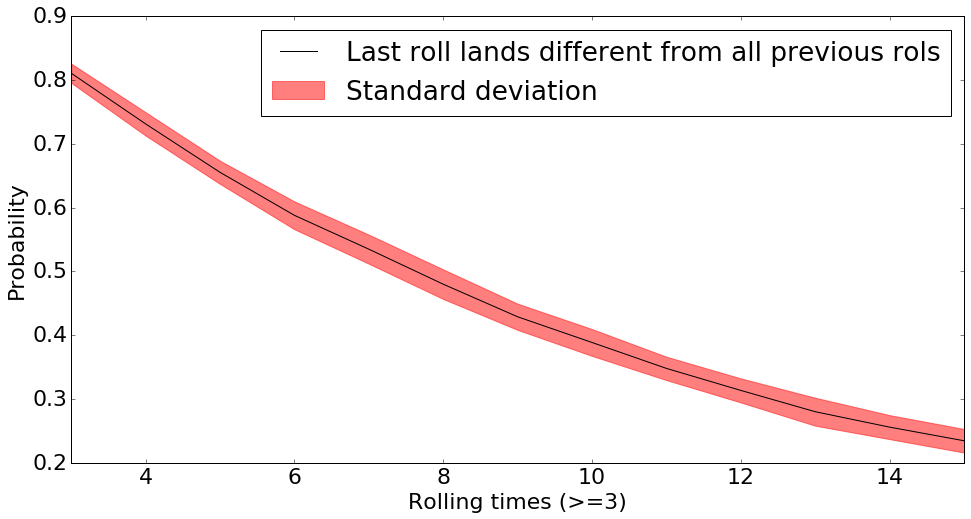

In [101]:
fig,ax = plt.subplots(figsize=(16,8))
results_mean = results.mean(1)
results_se = results.std(1)
ax.plot(ns,results_mean,'k-',alpha=1.,label='Last roll lands different from all previous rols')
ax.fill_between(ns,results_mean+results_se,results_mean-results_se,color='r',alpha=0.5,label='Standard deviation')
_=ax.set(xlabel='Rolling times (>=3)',ylabel='Probability',xlim=(ns.min(),ns.max()))
_=ax.legend(loc='best')

# Rolling a 7 faces dice, and see how many rolls it takes to have all possible outcomes. 

In [3]:
def dice(n):# now I define a 7 faces dice
    return np.random.choice(np.arange(1,8,1),size=n)

In [6]:
result=np.zeros((100,500))
for ii in range(100):
    for jj in range(500):
        temp=dice(ii)
        count_possible_outcomes = np.unique(temp)
        result[ii,jj]=len(count_possible_outcomes)

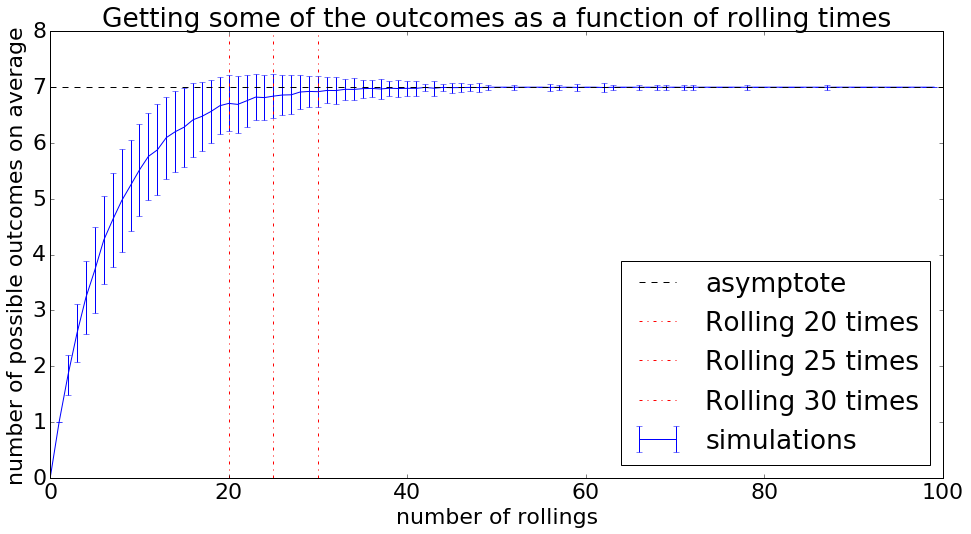

In [14]:
fig,ax = plt.subplots(figsize=(16,8))
means = result.mean(1)
stds = result.std(1)
ax.errorbar(np.arange(100),means,stds,label='simulations')
ax.axhline(7,color='k',linestyle='--',label='asymptote')
for num in [20,25,30]:
    ax.axvline(num,color='r',linestyle='-.',label='Rolling %d times'%num)
ax.set(xlabel='number of rollings',ylabel='number of possible outcomes on average',
      title='Getting some of the outcomes as a function of rolling times')
ax.legend(loc='best')

If you are really lucky, you could get all possible outcomes by rolling 20 times, but 30 is a better and more conservative guess. 

# Plotting probability to get all outcomes as a function of rolling time

In [34]:
result=np.zeros((100,500,50))
for kk in range(50):
    for ii in range(100):
        for jj in range(500):
            temp=dice(ii)
            count_possible_outcomes = len(np.unique(temp)) == 7
            result[ii,jj,kk]=count_possible_outcomes

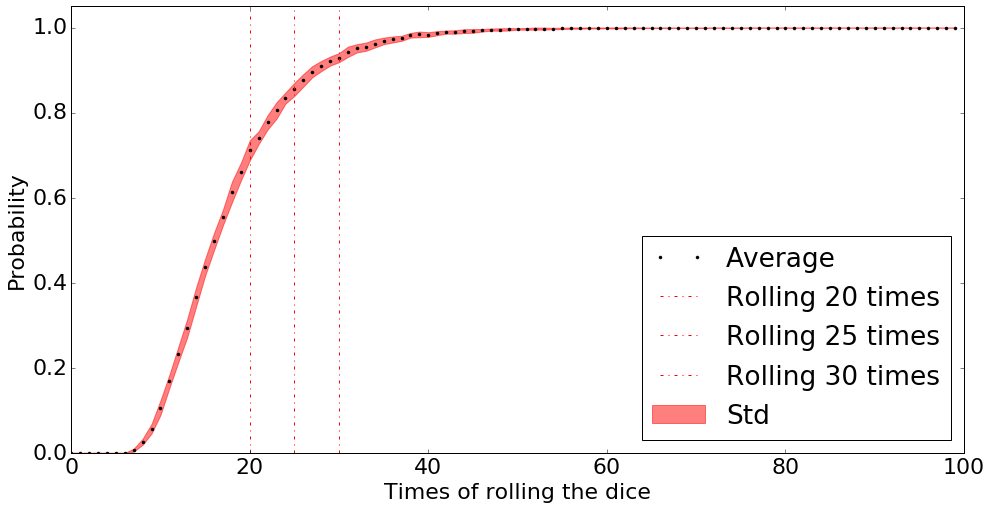

In [59]:
fig,ax = plt.subplots(figsize=(16,8))
means = result.mean(1).mean(1)
std = result.mean(1).std(1)
ax.plot(np.arange(100),means,'k.',alpha=1.,label='Average')
ax.fill_between(np.arange(100),means+std,means-std,color='r',alpha=0.5,label='Std')
ax.set(xlabel='Times of rolling the dice',ylabel='Probability',ylim=[0,1.05])
for num in [20,25,30]:
    ax.axvline(num,color='r',linestyle='-.',label='Rolling %d times'%num)
ax.legend(loc='lower right')

Same result as above